/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_52572/401421903.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  yahoo_webpage = pd.read_html(response.text)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_52572/401421903.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  ann_ret = (returns).prod() ** (252 / returns.count()) - 1


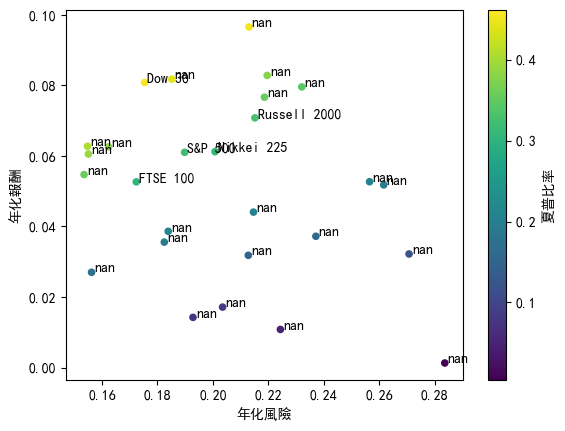

In [1]:
"""
全世界指數比較
1. 取得全世界指數
2. 計算指數報酬、風險
3. 繪製在點圖上 X軸為風險 Y軸為報酬
"""

# 載入函數工具檔
from Data import getDataYF, getMultipleReturn
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 繪圖套件載入中文字體
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 取出全世界指數
url = "https://finance.yahoo.com/world-indices"
response = requests.get(url)
yahoo_webpage = pd.read_html(response.text)
world_index_page = yahoo_webpage[0]
world_index_symbols = world_index_page["Symbol"].to_list()

# 抓到所有指數的歷史報酬率
ret_dataframe = getMultipleReturn(getDataYF, world_index_symbols, "adj close")

# 計算出每一個指數的年化報酬以及年化風險
return_risk = []
for col in ret_dataframe.columns:
    symbol_name = world_index_page.loc[
        world_index_page["Symbol"] == col, "Name"
    ].iloc[0]
    returns = ret_dataframe[col]
    ann_ret = (returns).prod() ** (252 / returns.count()) - 1
    ann_risk = (returns - 1).std() * (252**0.5)
    ann_sharp = ann_ret / ann_risk
    return_risk.append([symbol_name, ann_ret, ann_risk, ann_sharp])
# 每檔商品的風險報酬
rsdf = pd.DataFrame(return_risk)
rsdf.columns = ["名稱", "年化報酬", "年化風險", "夏普比率"]
rsdf.set_index("名稱", inplace=True)
rsdf = rsdf[rsdf["夏普比率"] < 0.5]
rsdf = rsdf[rsdf["年化風險"] < 1]

# 繪製scatter 點圖
ax = rsdf.plot.scatter(x="年化風險", y="年化報酬", c="夏普比率", colormap="viridis")

# 將商品代碼文字加上去圖表
for i, txt in enumerate(rsdf.transpose()):
    ax.annotate(txt, (rsdf["年化風險"].iloc[i] + 0.001, rsdf["年化報酬"].iloc[i]))
